# 31. Data Storytelling

## 31.1 Contents

## 31.3 Imports

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

/Users/thehoop/miniforge3/envs/odbc_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/thehoop/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2


## 31.4 Objectives

## 31.5 Load Adult Income Data from Kaggle

In [2]:
# Build full path to csv
csv_path = f"{path}/adult.csv"
# Load dataset
adult_income = pd.read_csv(csv_path)

adult_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Step 1 — 选一个 Audience（受众）

这个 dataset 的主题涉及收入不平等，非常适合这 3 种 audience：

你可以三选一：
A. Non-technical audience（老板/政策制定者）→ 推荐
重点讲 “洞察”和 “趋势”，不讲太多模型。

B. Technical audience（数据团队）
可以加入 correlation、heatmap、简单模型。

C. Executive audience（高层）
重点是 “决策意义”、“政策含义”。

👉 我建议你选 A（Non-technical）比较容易讲故事。

## Step 2 — 选择 narrative（核心故事线）
我们需要一句 “核心问题”，你的整个故事就是围绕这个问题展开。
这里给你 3 个你可以选的主线（任选其一）：

### Theme 1：哪些人最容易挣到超过 $50K？
子问题：
年龄与收入的关系？
教育程度是否提升收入？
性别是否存在差异？
不同行业/职业是否决定收入？
👉 这是最适合做故事的主题。

### Theme 2：Income Inequality（收入不平等）分析
可以分析：
男 vs 女 收入差异
不同种族（race）收入差异
受教育程度不同的收入差异

👉 这个主题更偏政策也很好讲。

### Theme 3：哪些变量对收入预测最重要？
适用于 technical audience。
📌 推荐你用 Theme 1（最容易讲，图也最好看）。

## ✔ Task 1：Count something interesting（计数分析）
成人样本总量是多少？
50K 的比例 vs <=50K 的比例是多少？
📌 图：Pie chart 或 bar chart

## ✔ Task 2：Find trends（趋势、模式）
你可以分析：
年龄 vs 高收入比例（随年龄增加，高收入机会怎样？）
工作小时数 vs 高收入比例
教育程度 vs 高收入比例
📌 图：histogram、line plot、bar plot

## ✔ Task 3：Compare two related quantities（比较两类人群）
例如：
男性 vs 女性 高收入比例
不同种族（race） vs 高收入比例
已婚 vs 未婚收入差异
📌 图：grouped bar chart

## ✔ Task 4：Scatterplot（散点图）
适合用：
education-num vs hours-per-week
age vs fnlwgt（人口权重 vs 年龄）
📌 图：scatterplot

## ✔ Task 5：Correlation（相关性）
你可以做：
连续变量 correlation heatmap（age, education-num, hours-per-week, capital-gain）
📌 图：heatmap

## ✔ Task 6：Insights（从图中提炼洞察）
例如：
教育程度对高收入有明显影响
男性更高比例进入 >50K
每周工作超过 40 小时的收入更高
职业（occupation）差异巨大：prof-specialty vs others
这些 insights 会直接成为你故事的“章节”。

## ✔ Task 7：Form a Hypothesis（建立一个假设）
例如：
“Higher education and longer working hours significantly increase the chance of earning more than $50K.”
然后你的图表会支持这个 hypothesis。

## ✔ Task 8：Questions for the future（进一步分析方向）
例如：
不同国家（native-country）是否影响收入？
哪些职业最容易高收入？
是否应建立一个 classification model 预测收入？

这些作为“结尾”。

## 31.6 Explore The Data

### 31.6.1 Dataset Overview

In [3]:
df = adult_income.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### 31.3.2 Data Processing

In [7]:
# Replace ? with NaN
df = df.replace("?", np.nan)

# Convert from object type to category type
# Category type can be used for: One-hot encoding, Label encoding, Logistic Regression/ Random Forest/ XGBoost
cat_cols = [
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "gender", "native-country", "income"
]

for col in cat_cols:
    df[col] = df[col].astype("category")

In [8]:
na_count = df.isna().sum()
na_percent = (df.isna().sum()) / len(df) * 100

na_table = pd.DataFrame({
    "NA Count": na_count,
    "NA Percent": na_percent.round(2).astype(str) + "%"
})

na_table = na_table.sort_values(by="NA Count", ascending=False)
na_table

,NA Count,NA Percent
occupation,2809,5.75%
workclass,2799,5.73%
native-country,857,1.75%
age,0,0.0%
fnlwgt,0,0.0%
education,0,0.0%
educational-num,0,0.0%
marital-status,0,0.0%
relationship,0,0.0%
race,0,0.0%


In [9]:
list(df['occupation'].unique())

['Machine-op-inspct',
 'Farming-fishing',
 'Protective-serv',
 nan,
 'Other-service',
 'Prof-specialty',
 'Craft-repair',
 'Adm-clerical',
 'Exec-managerial',
 'Tech-support',
 'Sales',
 'Priv-house-serv',
 'Transport-moving',
 'Handlers-cleaners',
 'Armed-Forces']

In [10]:
list(df['workclass'].unique())

['Private',
 'Local-gov',
 nan,
 'Self-emp-not-inc',
 'Federal-gov',
 'State-gov',
 'Self-emp-inc',
 'Without-pay',
 'Never-worked']

In [11]:
list(df['native-country'].unique())

['United-States',
 nan,
 'Peru',
 'Guatemala',
 'Mexico',
 'Dominican-Republic',
 'Ireland',
 'Germany',
 'Philippines',
 'Thailand',
 'Haiti',
 'El-Salvador',
 'Puerto-Rico',
 'Vietnam',
 'South',
 'Columbia',
 'Japan',
 'India',
 'Cambodia',
 'Poland',
 'Laos',
 'England',
 'Cuba',
 'Taiwan',
 'Italy',
 'Canada',
 'Portugal',
 'China',
 'Nicaragua',
 'Honduras',
 'Iran',
 'Scotland',
 'Jamaica',
 'Ecuador',
 'Yugoslavia',
 'Hungary',
 'Hong',
 'Greece',
 'Trinadad&Tobago',
 'Outlying-US(Guam-USVI-etc)',
 'France',
 'Holand-Netherlands']

In [12]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [13]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [14]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

## ⭐ Occupation Grouping (Recommended 6–7 Groups)

To simplify analysis and improve visualization clarity, the original 15 occupation categories are grouped into the following broader categories.

---

### **1. Professional (专业 & 管理类)**
Includes:
- `Prof-specialty`
- `Exec-managerial`
- `Tech-support`

---

### **2. Admin_Clerical (行政文员类)**
Includes:
- `Adm-clerical`

---

### **3. Sales (销售类)**
Includes:
- `Sales`

---

### **4. Service (服务业)**
Includes:
- `Other-service`
- `Priv-house-serv`
- `Protective-serv`

---

### **5. Blue_collar (蓝领工人类)**
Includes:
- `Craft-repair`
- `Machine-op-inspct`
- `Transport-moving`
- `Handlers-cleaners`

---

### **6. Agriculture (第一产业)**
Includes:
- `Farming-fishing`

---

### **7. Military (军人类，人数极少)**
Includes:
- `Armed-Forces` (only 15 records)

Can be:
- kept as a separate group, or  
- merged into **Service**

---

### **📌 Notes**
- Grouping helps reduce noise and improves interpretability.
- Very useful for visualizing:
  - Occupation vs Income (>50K)
  - High-income demographic patterns
  - Storytelling in data analysis


In [15]:
occupation_map = {
    'Prof-specialty': 'Professional',
    'Exce-managerial': 'Professional',
    'Tech-support': 'Professional',

    'Adm-clerical': 'Admin_Clerical',
    'Sales': 'Sales',

    'Other-service': 'Service',
    'Priv-house-serv': 'Service',
    'Protective-serv': 'Service',

    'Craft-repair': 'Blue_collar',
    'Machine-op-inspct': 'Blue_collar',
    'Transport-moving': 'Blue_collar',
    'Handlers-cleaners': 'Blue_collar',

    'Farming-fishing': 'Agriculture',

    'Armed-Forces': 'Military'
}

df['occ_group'] = df['occupation'].map(occupation_map)

## ⭐ Workclass Grouping (Recommended 4 Groups)

The original `workclass` variable contains several detailed categories, some of which have very small sample sizes.  
To improve readability and support storytelling, the categories are grouped into the following broader classes.

---

### **1. Private（私营部门）**
Includes:
- `Private`

The largest employment type in this dataset (~33,000 samples).

---

### **2. Government（政府部门）**
Includes:
- `Local-gov`
- `State-gov`
- `Federal-gov`

All public-sector jobs are merged into a single Government group.

---

### **3. Self-employed（自雇人士）**
Includes:
- `Self-emp-not-inc`
- `Self-emp-inc`

Represents individuals who own or run their own business.

---

### **4. Other（极少数 / 特殊情况）**
Includes:
- `Without-pay`
- `Never-worked`

These categories contain very few records and are grouped together.

---

### **📌 Notes**
- Grouping simplifies visualization (bar charts, income comparison).
- Very small categories are merged into “Other” to avoid noise.
- Useful for analyzing income distribution across employment types.


In [16]:
workclass_map = {
    'Private': 'Private',

    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Federal-gov': 'Government',

    'Self-emp-inc': 'Self-employed',
    'Self-emp-not-inc': 'Self-employed',

    'Without-pay': 'Other',
    'Never-worked': 'Other'
}

df['workclass_group'] = df['workclass'].map(workclass_map)

In [17]:
usa = ['United-States']

latin_america = ['Mexico', 'Guatemala', 'Nicaragua', 'Honduras', 'El-Salvador',
                'Columbia', 'Ecuador', 'Peru', 'Trinadad&Tobago', 'Haiti']

asia = ['China','Japan','India','Philippines','Vietnam','Taiwan','Thailand',
        'Cambodia','Laos','Hong']

europe = ['England','Germany','France','Italy','Poland','Portugal','Ireland',
          'Scotland','Hungary','Yugoslavia','Holand-Netherlands','Greece']

caribbean = ['Cuba', 'Jamaica', 'Dominican-Republic', 'Puerto-Rico']

def map_country(x):
    if x in usa:
        return "USA"
    elif x in latin_america:
        return "Latin_America"
    elif x in asia:
        return "Asia"
    elif x in europe:
        return "Europe"
    elif x in caribbean:
        return "Caribbean"
    else:
        return "Other"

df['country_group'] = df['native-country'].apply(map_country)

### 31.6.3 Exploratory Data Analysis (EDA)

#### Task 1

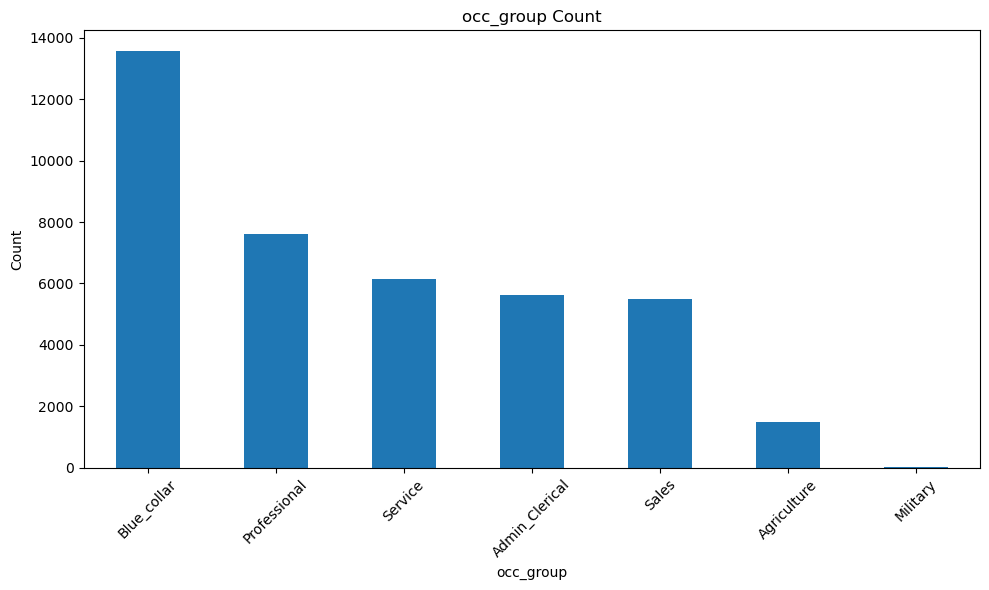

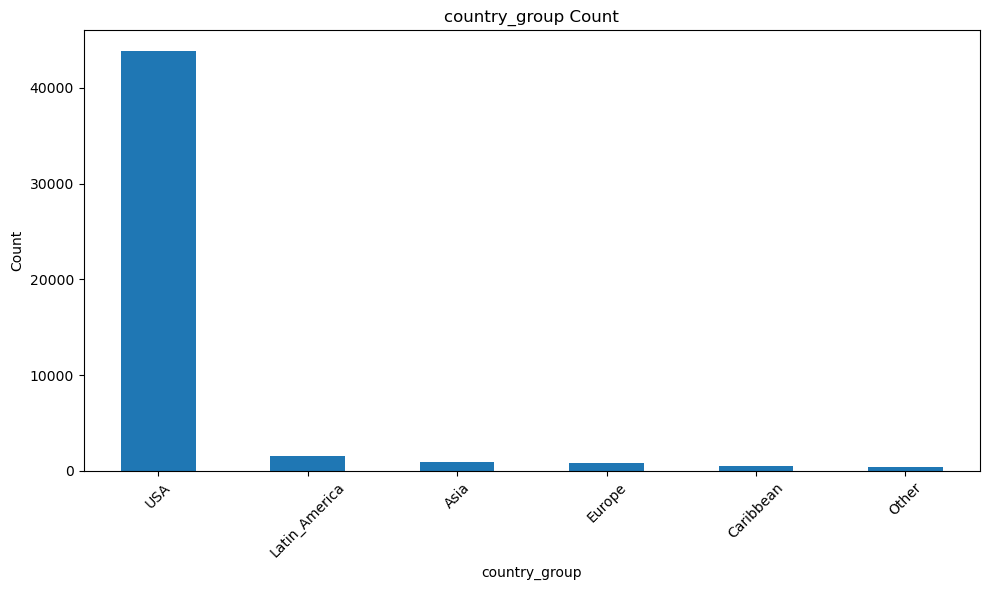

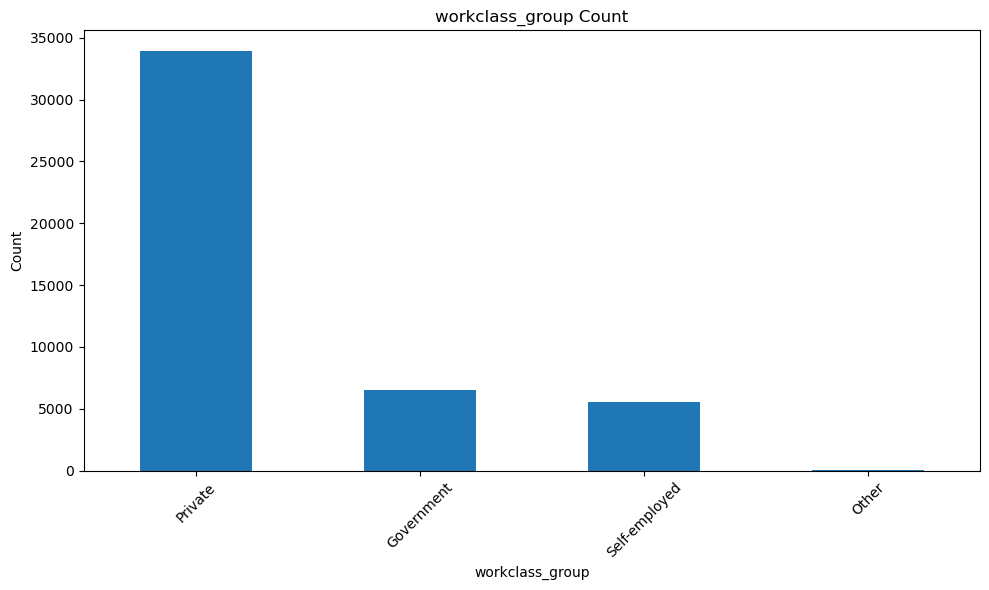

In [18]:
cols = ["occ_group", "country_group", "workclass_group"]
# df['occ_group'].value_counts().plot(kind='bar', figsize=(10,6))

for col in cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')

    plt.title(f"{col} Count")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Task 2: Categories vs Income barplot

<Figure size 1200x600 with 0 Axes>

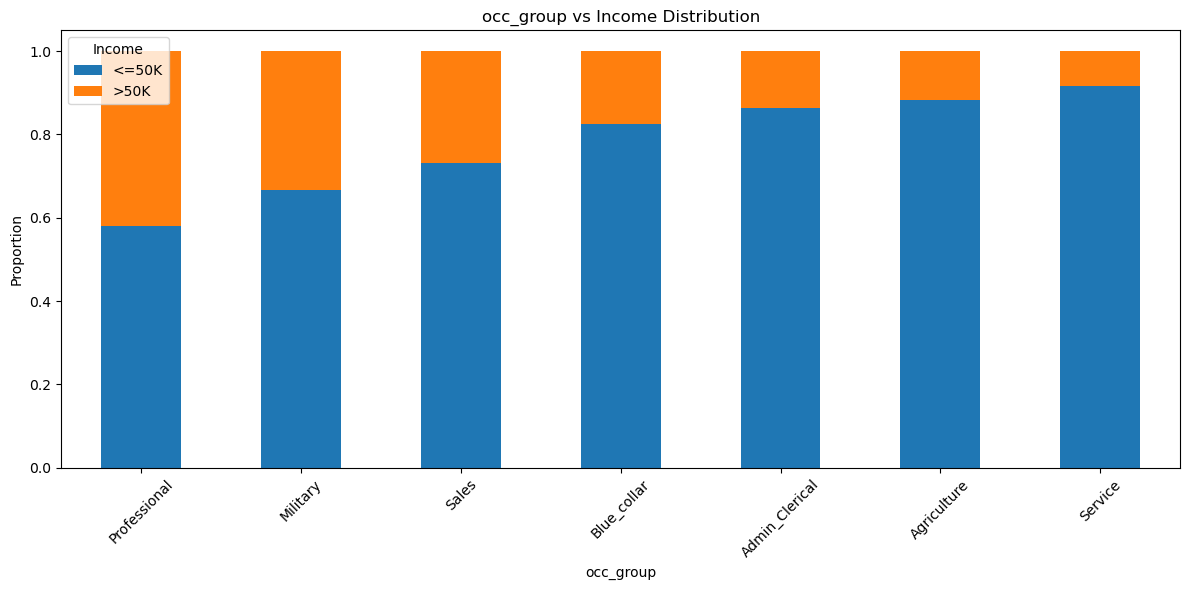

<Figure size 1200x600 with 0 Axes>

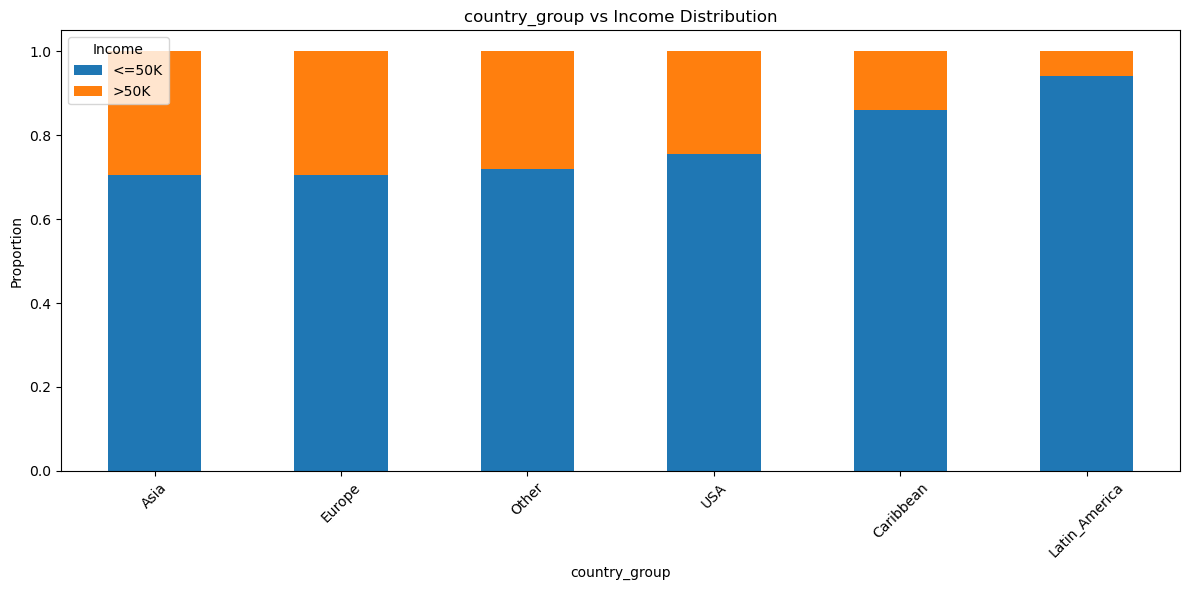

<Figure size 1200x600 with 0 Axes>

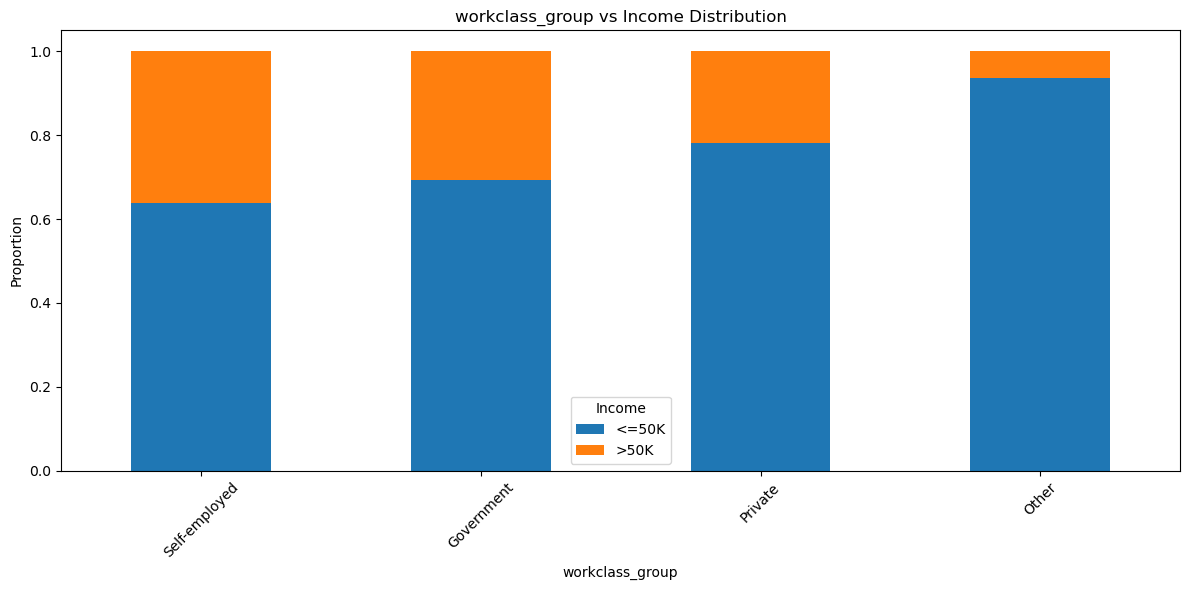

In [19]:
for col in cols:
    plt.figure(figsize=(12,6), num=f"{col} vs Income")

    # Compute the income percentage for each category
    # normalize=True这里的作用是把value_counts() convert to percentage vals
    group_income = df.groupby(col)['income'].value_counts(normalize=True).unstack()

    # Sort by percentage of >50k (descending)
    group_income = group_income.sort_values(by='>50K', ascending=False)

    group_income.plot(kind='bar', stacked=True, figsize=(12,6))

    plt.title(f"{col} vs Income Distribution")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title="Income")
    plt.tight_layout()

    plt.show()

1. Professionals and military occupations have the highest income chances; service and agriculture are the lowest. The sample size for the military profession is quite small, which is something to be concerned about.
2. Asia/ Europe/ Other-born individuals have the highest income probability; Latin America and Caribbean groups have the lowest.
3. Self-employed and government workers tend to earn more; private-sector workers earn the least.

In [20]:
df['income'].unique()

['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']

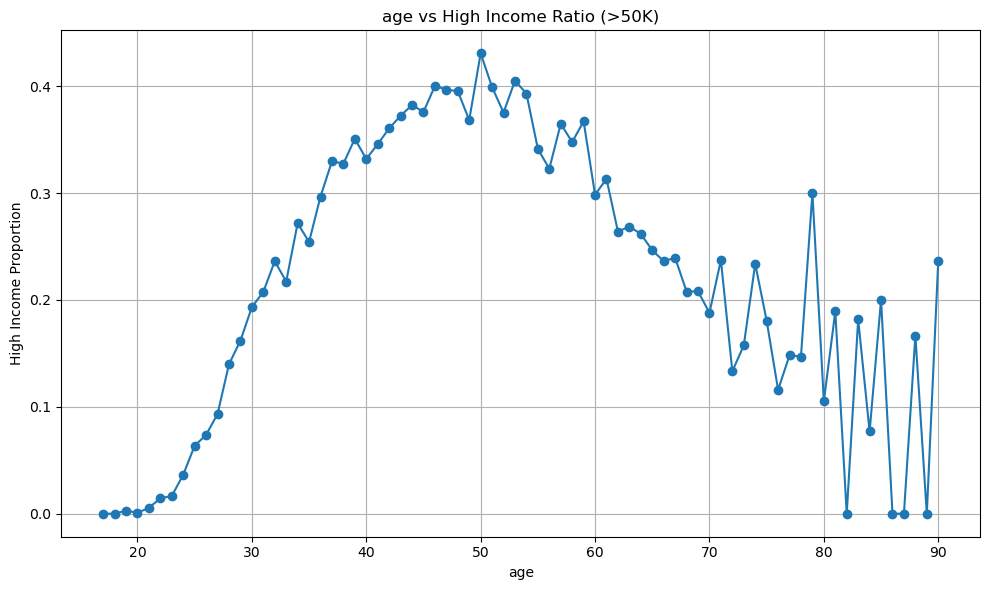

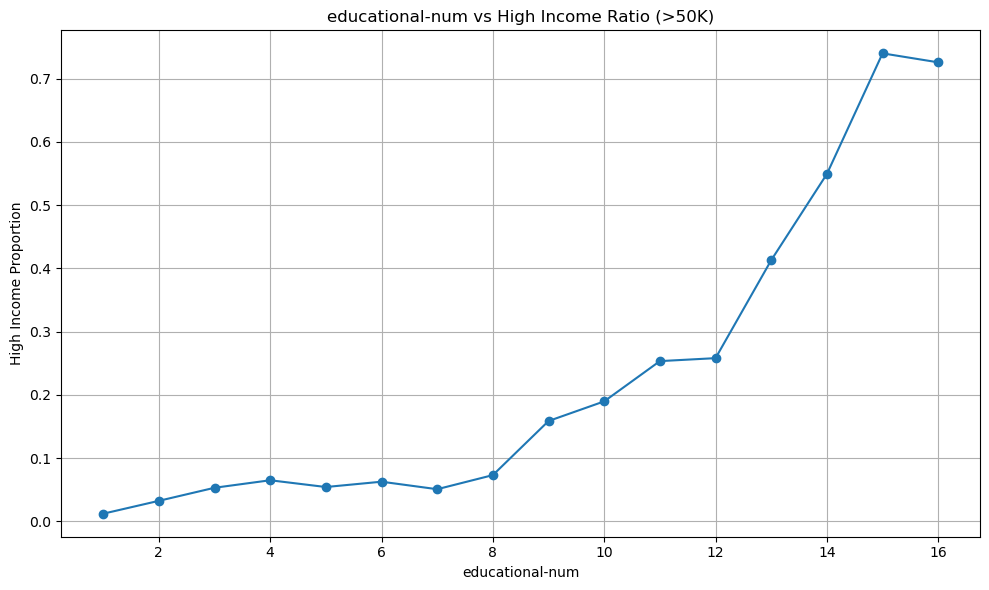

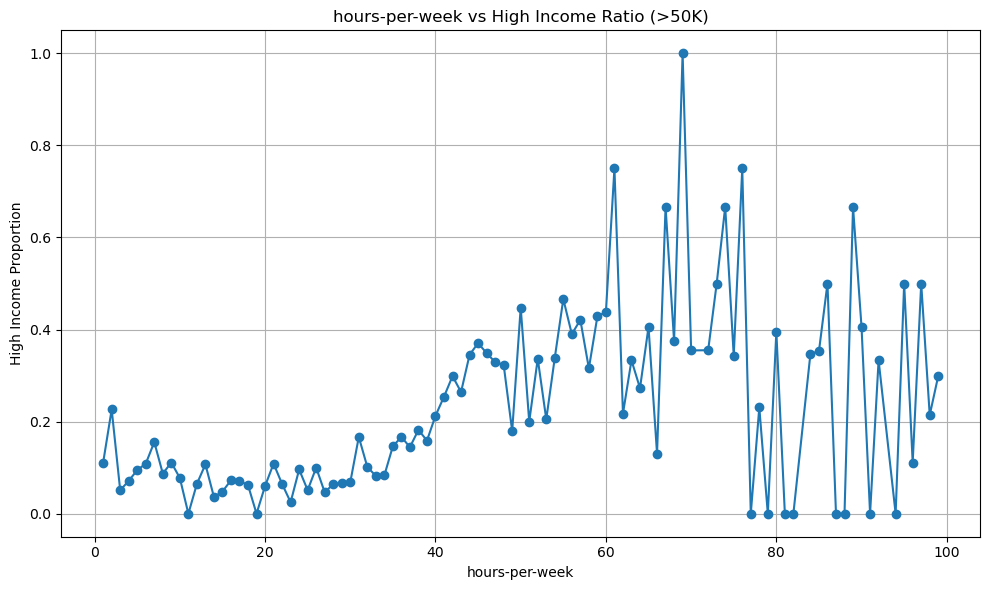

In [21]:
num_cols = ['age', 'educational-num', 'hours-per-week']
df['high_income'] = (df['income'] == '>50K').astype(int)

for num_col in num_cols:
    plt.figure(figsize=(10, 6), num=f"High Income Proportion vs {num_col}")
    # Group the numerical variable, and calculate the mean
    # The mean represents the proportion of people earning >=50K, high income)
    ratio = df.groupby(num_col)['high_income'].mean()

    plt.plot(ratio.index, ratio.values, marker='o')
    plt.title(f"{num_col} vs High Income Ratio (>50K)")
    plt.xlabel(num_col)
    plt.ylabel("High Income Proportion")
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

1. Income follows a life-cycle pattern: it rises rapidly with age, peaks around 40–50, and then declines.
2. Higher education leads to a significantly higher probability of earning >50K.
3. More weekly working hours correlate with higher income, especially above 40 hours.

In [22]:
# Drop the following variables, and replace with 
df = df.drop(['occupation', 'workclass', 'native-country'], axis=1)

df = pd.get_dummies(df, drop_first=True)

df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,high_income,education_11th,education_12th,education_1st-4th,...,occ_group_Sales,occ_group_Service,workclass_group_Other,workclass_group_Private,workclass_group_Self-employed,country_group_Caribbean,country_group_Europe,country_group_Latin_America,country_group_Other,country_group_USA
0,25,226802,7,0,0,40,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,28,336951,12,0,0,40,1,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,44,160323,10,7688,0,40,1,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,18,103497,10,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


<Axes: xlabel='high_income'>

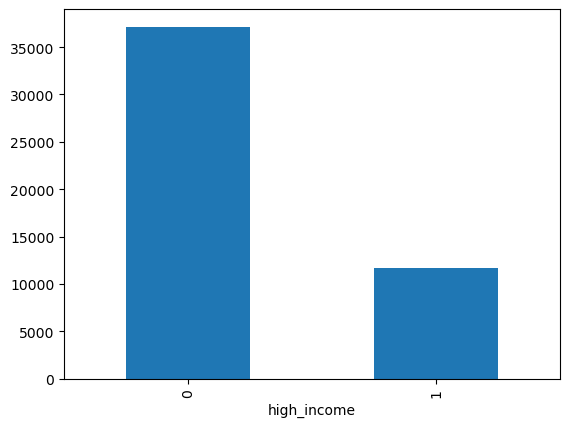

In [23]:
df["high_income"].value_counts().plot(kind="bar")

train_test_split：把数据切成训练集 / 测试集。

KFold：实现 K 折交叉验证（把训练集再分成 K 份轮流做 train/valid）。

cross_val_score：配合 KFold，对模型做交叉验证并给出每一折的得分。

StandardScaler：做标准化，把特征变成均值 0、方差 1。

LogisticRegression：逻辑回归模型（分类用）。

Pipeline：把“标准化 + 模型”打包成一个整体，避免信息泄露、代码也更简洁。

### 31.7 Train/ Test Split

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X = df.drop(columns=['high_income', 'income_>50K'], axis=1)
y = df["high_income"]

# a). train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Task 3. Correlation Matrix Heatmap

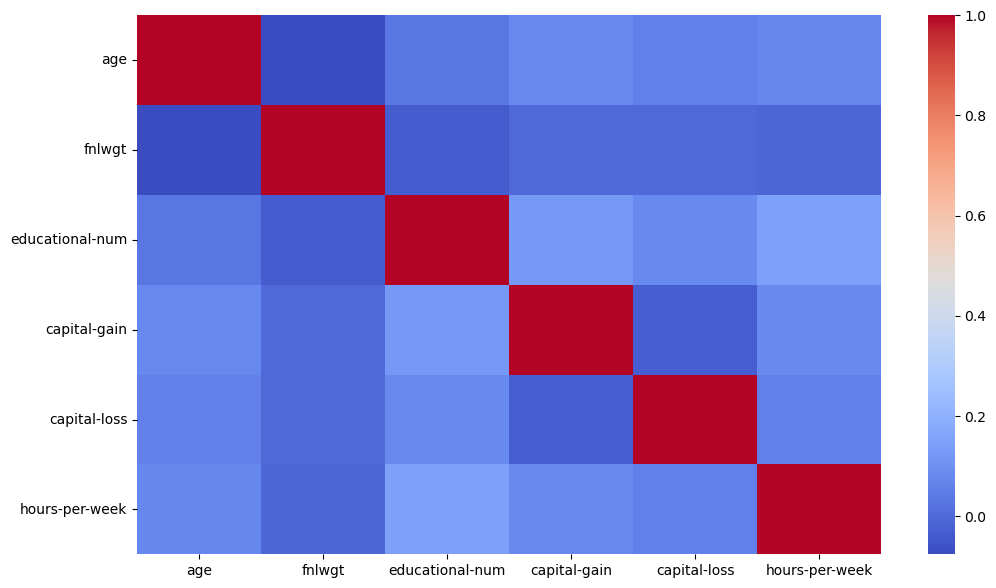

In [25]:
numeric_cols = X.select_dtypes(include=['int64']).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(X[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.show()

This heatmap shows that the dataset does not exhibit strong multicollinearity, so removing features or performing additional feature selection is not necessary.

### 31.8.1 Standardization Scaling - Logistic Regression

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Scaling Standarization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling
logreg = LogisticRegression(max_iter=1000)

# KFold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
logreg_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring="accuracy")

In [27]:
print("Logistic Regression CV scores:", logreg_scores.round(4))
print("Logistic Regression Mean CV accuracy:", logreg_scores.mean().round(4))
print("Logistic Regression CV std:", logreg_scores.std().round(4))

Logistic Regression CV scores: [0.848  0.8488 0.8502 0.8455 0.8481]
Logistic Regression Mean CV accuracy: 0.8481
Logistic Regression CV std: 0.0015


1. ***___CV Scores:___***
   - The model is stable and does not rely on any particular training split.
   - No severe noise or extreme outliers in the data that cause large performance fluctuations.
2. ***___Mean CV Accuracy:___***
   The baseline accuracy of Logistic Regression on the Adult Income datasert is approximately 84.8%.

   This serves as the most important baseline model.
   We can later compare more complex models such as XGBoost or LightGBM against this baseline.
   If a new model clearly outperform 84.8%, then the Logistic Regression with be replaced with the new model.
4. ***___CV Scores:___***
   This is an extremely low standard deviation

   which indicates:
   - Performance across all folds is almost identical
   - The model is very stable
   - The class distribution is well-balanced across folds
   - 
5. Overfitting needs to be concerned because there is almost no variation between folds.

In [28]:
# Train model with training set
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

### 31.9.1 Model Evaluation - Logistic Regression

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediction
y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7431
           1       0.75      0.59      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769

[[6961  470]
 [ 962 1376]]


The model performs very well on predicting ***low-income individuals (class 0)*** with ***high precision (0.88)***, ***recall (0.94)***, and ***F1-score (0.91)***.
However, performance on ***high-income individuals (class 1)*** is noticeably weaker, with a recall of only ***0.59*** and an ***F1-score*** of ***0.66*** indicating that many high-income cases are misclassified as low-income.

This suggests the need for class balancing techniques or more advanced models to improve minority class performance.

High precision but low recall for the high-income class indicates that the model is conservative in predicting class 1: it only predicts high income when the pattern is very strong, but it fails to capture many true high-income individuals.

This pattern is typical of imbalanced datasets where class 1 has fewer samples, making it harder for the model to learn a robust decision boundary.

## 🔍 Model Evaluation Summary (Precision, Recall, F1-score)

### **1️⃣ Precision（精准率）**
**Class 0（0.88）**  
在被预测为低收入的人当中，有 **88%** 确实是真低收入。

**Class 1（0.75）**  
在被预测为高收入的人当中，有 **75%** 确实真的是高收入。

➡️ 模型在预测高收入的人时，**四分之一会误判（FP 较多）**。

---

### **2️⃣ Recall（召回率）**
**Class 0（0.94）**  
所有真正低收入的人中，模型找出了 **94%**。  
说明：  
- ✔ 模型非常擅长识别低收入  
- ✔ FN（漏掉）的情况非常少  

**Class 1（0.59）**  
所有真正高收入的人中，模型只找到了 **59%**。

➡️ 模型漏掉了许多高收入人群（FN 很大）  
➡️ Adult Income 数据集常见问题：高收入人数少 → 模型偏向预测为低收入（0 类）

---

### **3️⃣ F1-score（综合指标）**
F1 是 Precision 与 Recall 的综合评分：

**Class 0（0.91）** → 表现非常好，几乎完美分类。

**Class 1（0.66）** → 中等表现，因为 recall 和 precision 都偏低。

➡️ 模型对高收入人的预测能力仍有明显提升空间。

---

### **4️⃣ Accuracy（整体准确率：0.85）**
整体准确率虽高，但：

⚠️ **不一定代表模型好，因为数据不平衡（0 类样本更多）**

---

### **5️⃣ Macro average（0.78） & Weighted average（0.85）**

**Macro avg（0.78）**  
不考虑样本数量，平均精度较低 → **模型对 class 1 表现不足**

**Weighted avg（0.85）**  
按类别样本量加权，结果较高  
➡️ 因为模型对数量更多的 class 0 表现好，**拉高整体平均**

---

### ✅ 总结
- 模型对低收入（class 0）表现非常好  
- 模型对高收入（class 1）表现相对较弱  
- 后续可考虑 class_weight、SMOTE、XGBoost、threshold tuning 来提升 class 1 的预测能力


We will use logistic regression as the baseline model and compare its performance with an XGBoost model.

### 31.8.2 XGBoost Modeling

In [30]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Fit the model to training data
xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
# KFold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring="accuracy")

print("XGBoost CV scores:", xgb_scores.round(4))
print("XGBoost Mean CV accuracy:", xgb_scores.mean().round(4))
print("XGBoost CV std:", xgb_scores.std().round(4))

XGBoost CV scores: [0.8685 0.865  0.8705 0.8654 0.8668]
XGBoost Mean CV accuracy: 0.8672
XGBoost CV std: 0.002


Just like Logistic Regression, XGBoost also demonstrates that it does not rely on any particular training split. No severe noise or extreme outliers are present in the data. Using Logistic Regression as the baseline model, XGBoost achieves superior performance.

### 31.9.2 Model Evaluation - XGBoost

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediction
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7431
           1       0.83      0.69      0.75      2338

    accuracy                           0.89      9769
   macro avg       0.87      0.82      0.84      9769
weighted avg       0.89      0.89      0.89      9769

[[7101  330]
 [ 725 1613]]


Compared to Logistic Regression, the XGBoost model performs better in ***predicting low-income individuals (class 0)***, achieving higher ***precision (0.91)***, ***recall (0.96)***, and ***F1-score (0.93)***. It also shows clear improvement in identifying ***high-income individuals (class 1)***, with ***precision*** increasing to ***0.83*** and ***recall*** to ***0.69***.

/var/folders/vl/d4jp3x4n6pvgdsw9fp1v7m6h0000gn/T/ipykernel_2290/1395989220.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='Importance', y='Feature', palette='viridis')


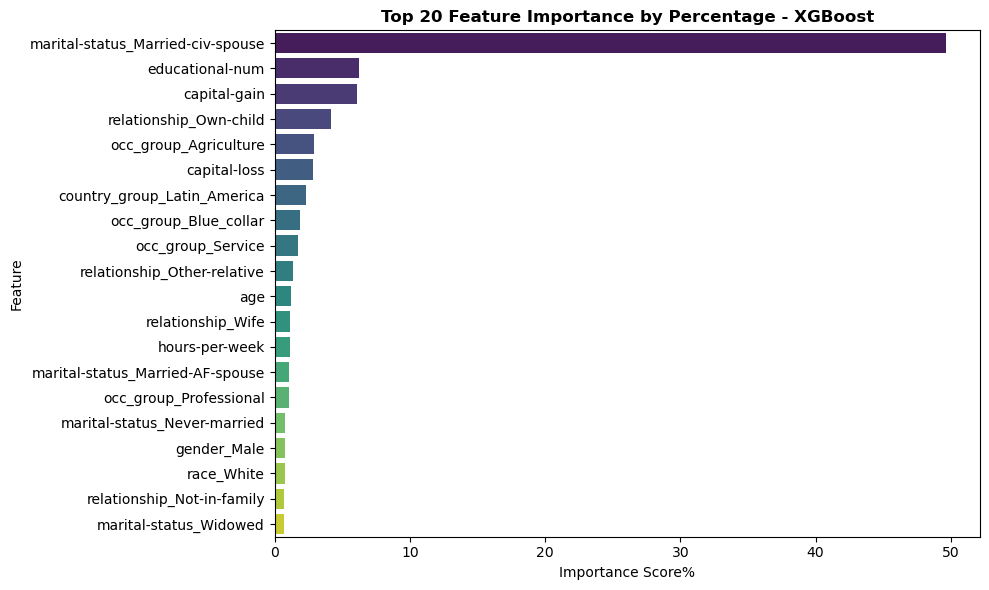

In [33]:
import seaborn as sns
from xgboost import plot_importance

importances = xgb.feature_importances_
feature_names = X.columns

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
})

# Convert to percentage%
importance_df['Importance'] = (
    importance_df['Importance'] / importance_df['Importance'].sum() * 100
).round(2)

# Top 20 features
top20 = importance_df.sort_values(by="Importance", ascending=False).head(20)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top20, x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importance by Percentage - XGBoost", fontweight="bold")
plt.xlabel("Importance Score%")
plt.ylabel("Feature")
plt.tight_layout()

plt.show()

The most influential features include ***marital status***, ***age***, ***capital gain***, ***education level***, and ***hours worked per week***.

***Higher values of education***, ***capital gain***, and ***work hours***, as well as being ***married***, significantly increase the probability of being predicted as high income.

## Understanding Capital Gain & Capital Loss in the SHAP Summary Plot

### 1. Color Meaning (Red vs Blue)
In a SHAP summary plot:

- **Red = high feature value**
- **Blue = low feature value**

⚠️ **Important:**  
Color does *not* indicate high-income or low-income prediction.  
It only represents whether the feature value itself is high or low.

The width of each feature’s SHAP value distribution reflects its overall impact on the model:

✔ Wider = more influential feature
✔ Narrow = less impactful

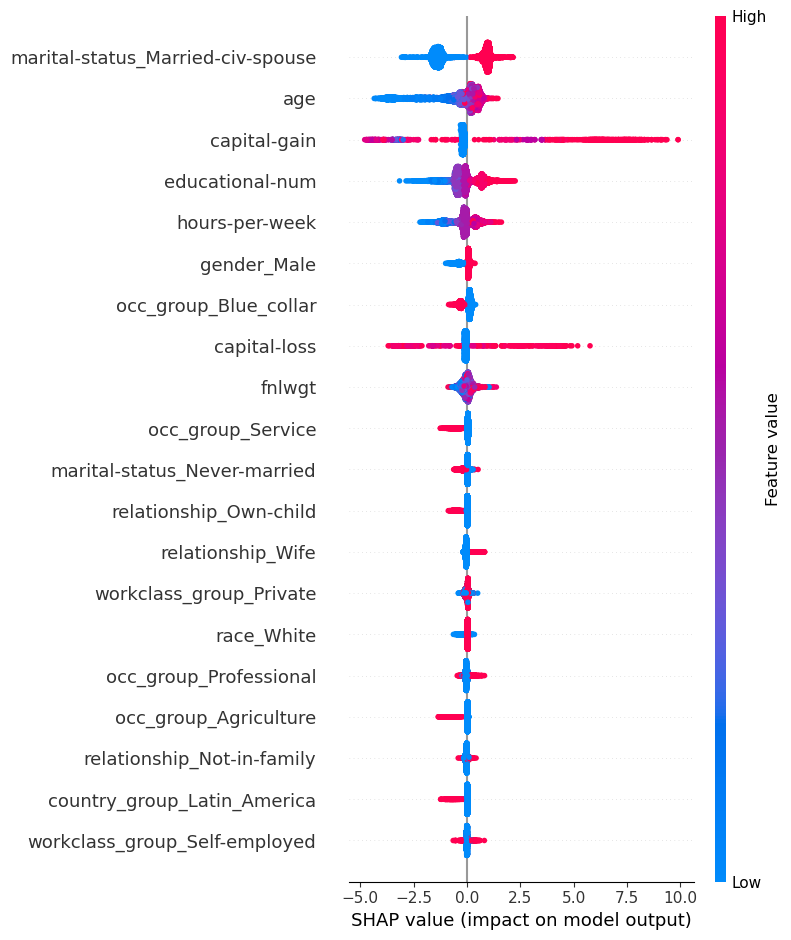

In [34]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=20)

### 3. Case 2: Education Num (red) -> high income
Individuals with higher education levels are more likely to be predicted as high income.

There is a clear interaction between education and marital status:
married individuals tend to have higher predicted income even at the same education level.

### 3. Case 2: High Capital Gain (red) → Pushes prediction toward high income
This is intuitive:

- Large capital gains usually indicate higher wealth.  
- Therefore, high values (red dots) appear on the **right side**  
  → **Positive SHAP value → pushes toward high-income class**.

### 4. Case 3: High Capital Gain (red) → Pushes prediction toward low income
This happens in special scenarios:

- Some individuals have a **non-zero** capital gain (so SHAP colors it red),
- But the actual gain is **very small** (e.g., only a few dollars).

In these cases:

- The feature value looks "high" relative to zero → colored **red**
- But the model understands that such a small gain does **not** indicate high income
- So SHAP assigns a **negative SHAP value**  
  → appears on the **left side**, meaning it pushes the prediction toward **low income**

This explains why the same feature (e.g., Capital Gain) can appear on both sides of the SHAP plot.

- High-age (red) points cluster near the positive SHAP values, meaning older individuals generally push the model toward predicting higher income.
- Low-age (blue) points extend much further to the negative side, meaning younger individuals strongly push the model toward predicting lower income.
- The blue tail is longer because the model sees age as a stronger signal for low income than for high income.

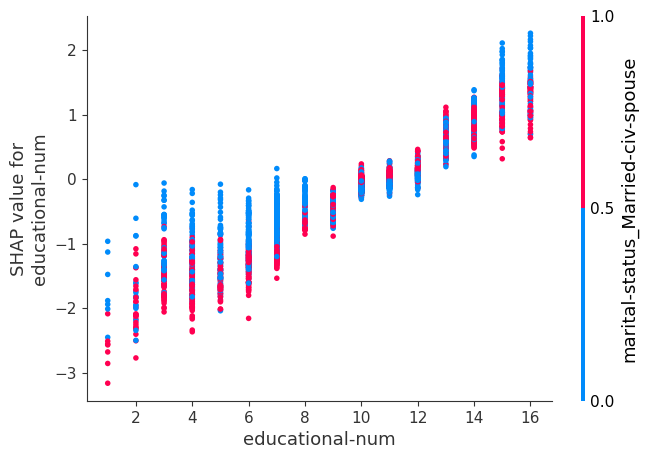

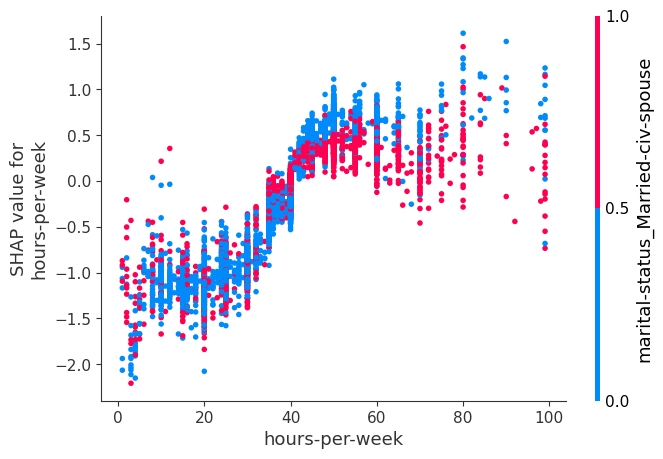

In [35]:
shap.dependence_plot("educational-num", shap_values, X_test)
shap.dependence_plot("hours-per-week", shap_values, X_test)

- Working fewer than 30 hours per week is strongly associated with low-income predictions.

- Working more than 40 hours per week substantially increases the likelihood of being predicted as high income.

- Marital status further amplifies this trend: among high-hour workers, married individuals receive even higher SHAP contributions toward high-income predictions.